In [1]:
import pandas as pd
import sklearn 
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/ec2-user/SageMaker/data/NYT_scores/2023-08-09-NYT-fuelefficiency_score.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df['year'] = df['date'].dt.year

In [6]:
df['GOID'] = df['Unnamed: 0']

In [9]:
import seaborn as sn
sn.set(rc={'figure.figsize':(30,7)})
ax=sn.boxplot(x='year', y='score', data=df.loc[(df['year']>1980) & (df['year']<2005)], palette="Set3", linewidth=1)
ax

<AxesSubplot:title={'center':'Distribution of scores - fuel economy'}, xlabel='year', ylabel='score'>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()
plt.rcdefaults()

# matplotlib histogram
plt.hist(df['score'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

#sns.distplot(df['score'], hist=True, kde=False, 
#             bins=int(180/5), color = 'blue',
#             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of scores - fuel economy')
plt.xlabel('scores for fuel economy')
plt.ylabel('distribution')
#sns.display()

Text(0, 0.5, 'distribution')

In [ ]:
#new_df = df.loc[(df['score']>0.45) & (df['score']<0.65)]
#new_df = new_df.sample(300)
#new_df = new_df.sort_values(by='score')
#new_df.to_csv('/home/ec2-user/SageMaker/data/manual_classification/semantic_fuelefficiency0.45_0.60_n300.csv')

In [ ]:
#random_df = df.loc[(df['date']>'2019-09-01') & (df['date']<'2019-12-31') & (df['score']>0.3)]
#random_df.to_csv('/home/ec2-user/SageMaker/data/random_sample_reading/semantic_greenervehicles.csv')

In [161]:
df1 = pd.read_csv('/home/ec2-user/SageMaker/data/manual_classification/semantic_fuelefficiency0.45_0.60_n300.csv')

In [162]:
df1['GOID'] = df1['Unnamed: 0.1']
df1 = df1[['GOID','score', 'Classification_broad', 'Classification_cars']]

In [163]:
df1.head(3)

,GOID,score,Classification_broad,Classification_cars
0,113463667,0.450116,0,0
1,1815161169,0.450196,1,1
2,91345945,0.450211,0,0


In [164]:
df2 = df[['GOID', 'date', 'year']]

In [165]:
tune_df = df1.set_index('GOID').join(df2.set_index('GOID'), how = 'inner')

In [166]:
tune_df = tune_df.dropna()

In [167]:
tune_df['Classification_cars'] = pd.to_numeric(tune_df['Classification_cars'])
tune_df['Classification_broad'] = pd.to_numeric(tune_df['Classification_broad'])

In [168]:
tune_df['Classification_cars'] = tune_df['Classification_cars'].astype('int')

In [228]:
tune_df['class'] = np.where(tune_df['score'] > 0.482, 1, 0)

In [229]:
tune_df.head(3)

,score,Classification_broad,Classification_cars,date,year,class
GOID,,,,,,
113463667,0.450116,0,0,1955-01-03,1955,0
1815161169,0.450196,1,1,2013-11-24,2013,0
91345945,0.450211,0,0,2000-07-20,2000,0


In [230]:
report_cars_482 =pd.DataFrame(classification_report(tune_df['class'], tune_df['Classification_broad'], output_dict = True)).transpose()

In [231]:
report_cars_482.to_csv('/home/ec2-user/SageMaker/data/NYT-accuracy/20230824-classificationreport-cars.csv')

In [224]:
x = []
y = []
for i in np.arange(0.45, 0.55, 0.001):
    x.append(i)
    tune_df['class'] = np.where(tune_df['score'] > i, 1, 0)
    sc = accuracy_score(tune_df['Classification_cars'], tune_df['class'])
    y.append(sc)
    

In [225]:
score_df_broad = pd.DataFrame({'cut-off':x, 'score':y})

In [226]:
score_df_broad.sort_values(by='score')

,cut-off,score
0,0.462,0.531773
1,0.463,0.535117
2,0.464,0.548495
3,0.465,0.555184
83,0.545,0.565217
...,...,...
42,0.504,0.635452
22,0.484,0.638796
19,0.481,0.638796
21,0.483,0.642140


In [227]:
score_df_broad.to_csv('/home/ec2-user/SageMaker/data/NYT-accuracy/20230824-fuelefficiency-cars.csv')

In [173]:
tune_df['class'] = np.where(tune_df['score'] > 0.482, 1, 0)

In [131]:
df['class'] = np.where(df['score'] > 0.38, 1, 0)

In [132]:
df['GOID'] = df['Unnamed: 0']

In [133]:
df['date'] = pd.to_datetime(df['date'])

In [134]:
len(df[df['class']==1])

7230

In [135]:
df_count = df.groupby([df['date'].dt.year.rename('year'), df['date'].dt.month.rename('month')]).agg({'score':'count', 'class': 'sum'})

In [136]:
df_count

score  class
year month              
1851 9        463      0
     10      1504      0
     11      1189      0
     12      1074      0
1852 1       1193      0
...           ...    ...
2019 8       2322      2
     9       2847      0
     10      2852      2
     11      2755      2
     12      2732      1

[2018 rows x 2 columns]

In [137]:
df_count['normalize'] = df_count['class']/df_count['score']

In [138]:
df_count

score  class  normalize
year month                         
1851 9        463      0   0.000000
     10      1504      0   0.000000
     11      1189      0   0.000000
     12      1074      0   0.000000
1852 1       1193      0   0.000000
...           ...    ...        ...
2019 8       2322      2   0.000861
     9       2847      0   0.000000
     10      2852      2   0.000701
     11      2755      2   0.000726
     12      2732      1   0.000366

[2018 rows x 3 columns]

In [139]:
df_count.to_csv('/home/ec2-user/SageMaker/data/NYT_scores/2023-08-24-NYT-fuelefficiency_0.38-index-monthly.csv')

In [140]:
df_count = df_count.reset_index()

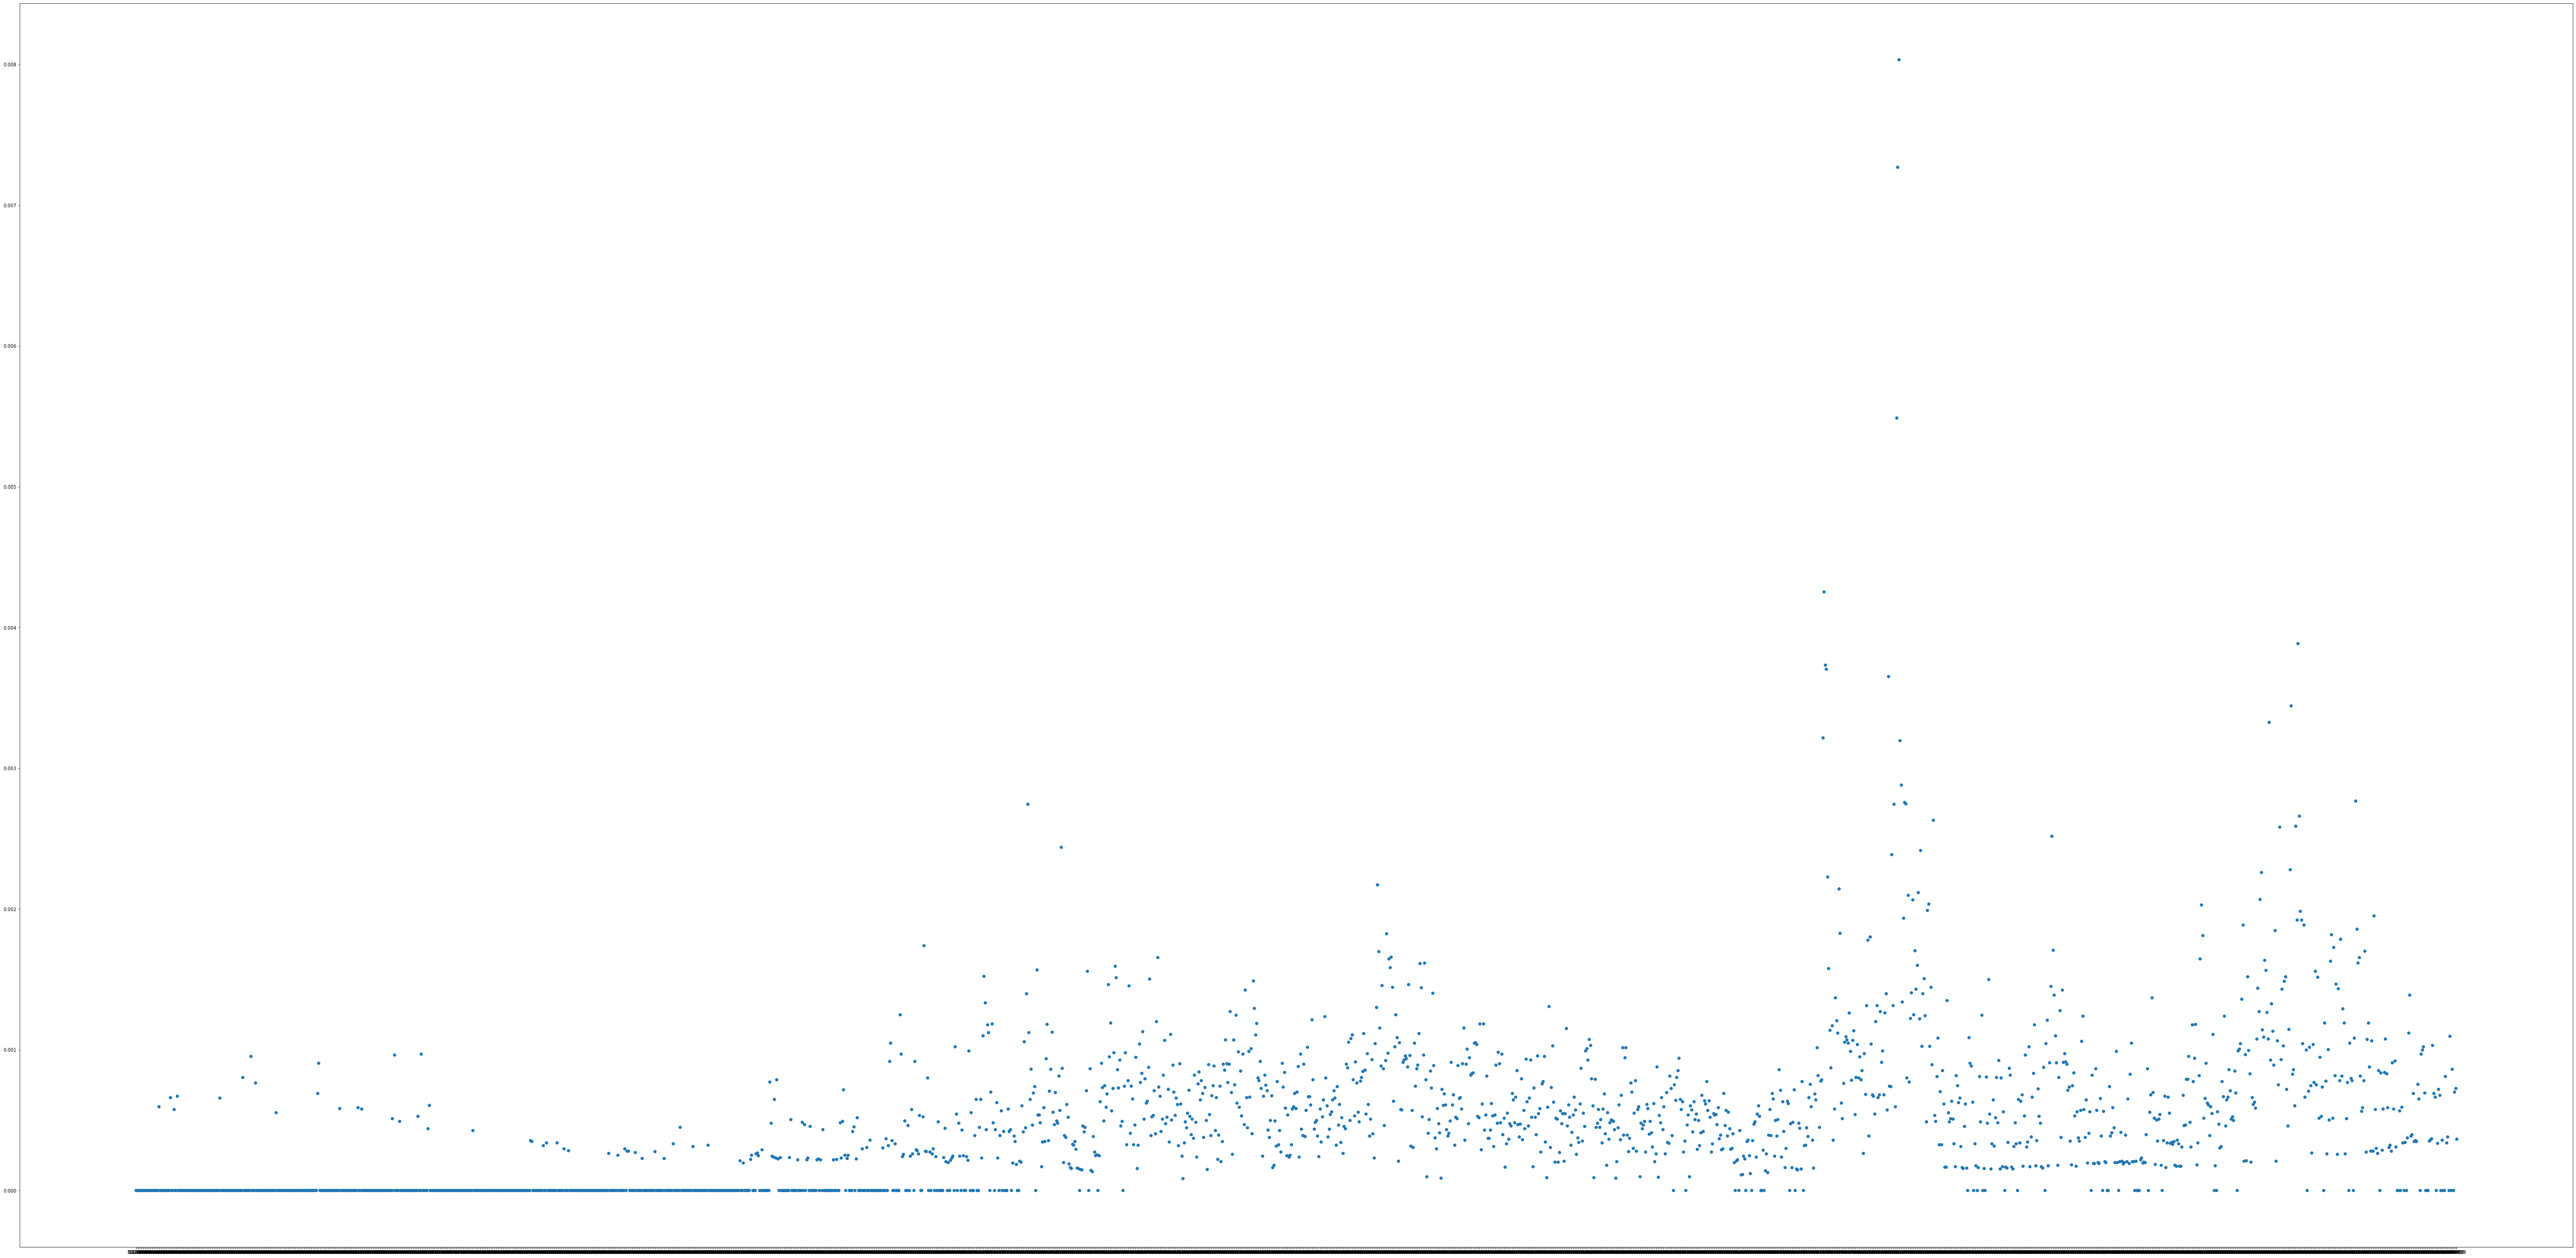

In [141]:
df_count['date']=df_count['month'].map(str)+'-'+df_count['year'].map(str)
#fig, ax=plt.subplots()
plt.figure(figsize=(100,50))
plt.plot_date(df_count['date'],df_count['normalize'])
plt.show()

In [142]:
df_count_Q = df.groupby([df['date'].dt.year.rename('year'), df['date'].dt.quarter.rename('quarter')]).agg({'score':'count', 'class': 'sum'})

In [143]:
df_count_Q['normalize'] = df_count_Q['class']/df_count_Q['score']
df_count_Q.to_csv('/home/ec2-user/SageMaker/data/NYT_scores/2023-08-24-NYT-fuelefficiency_0.38-index_quarter.csv')

In [130]:
df_count_Q

score  class  normalize
year quarter                         
1851 3          463      0   0.000000
     4         3767      0   0.000000
1852 1         3283      0   0.000000
     2         2906      0   0.000000
     3         3563      0   0.000000
...             ...    ...        ...
2018 4         8500      0   0.000000
2019 1         8087      1   0.000124
     2         8171      0   0.000000
     3         7785      1   0.000128
     4         8339      1   0.000120

[674 rows x 3 columns]

In [ ]:
df_count_Q = df_count_Q.reset_index()
df_count_Q['date']=df_count_Q['quarter'].map(str)+'-'+df_count_Q['year'].map(str)
#fig, ax=plt.subplots()
plt.figure(figsize=(100,50))
plt.plot_date(df_count_Q['date'],df_count_Q['normalize'])
plt.show()

In [ ]:
df.head(3)

In [ ]:
lst = df.loc[(df['score'] >= 0.20) & (df['score'] <= 0.21)]

In [ ]:
lst